In [15]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams['figure.facecolor'] = 'white'

# Data

# open 3A1_Drag.xlsl

In [16]:
import pandas as pd
# load xlsl file into dataframe
df = pd.read_excel('3A1_Drag.xlsx', sheet_name='Sheet1', header=1)

# split df into the 4 different cases
N = 12
flat_plate = df.iloc[0:0+N]
sphere = df.iloc[15:15+N]
sphere_trip = df.iloc[30:30+N]
streamlined = df.iloc[45:45+N]

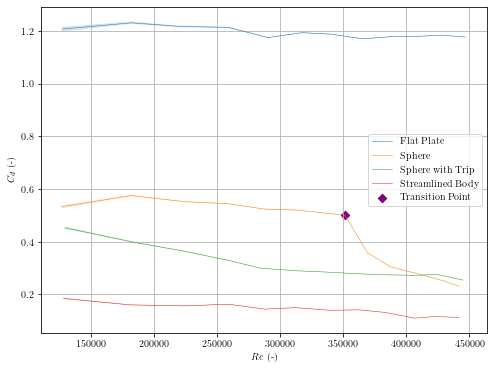

In [17]:
def plot_Cd_vs_Re(ax, df, label):
    Re = np.array(df["Reynolds Number"], dtype=float)
    Cd = np.array(df["Body Drag Coefficient"], dtype=float)
    dp = np.array(df["Pressure Drop (milibar)"], dtype=float)
    D = np.array(df["Drag Reading"], dtype=float)
    T = np.array(df["Temperature C"], dtype=float) + 273.15

    ax.plot(Re, Cd, label=label, linewidth=0.5)
    # semilog x
    #ax.semilogx(df["Reynolds Number"], df["Body Drag Coefficient"], label=label)

    u_rho_a = 1 / T + 10 / 1e5

    u_Cd = 0.005 / dp + 0.05 / D
    u_Re = 0.5 * 0.005 / dp + u_rho_a

    Re_fill = np.repeat(Re, 2)
    Re_fill[::2] -= u_Re * Re
    Re_fill[1::2] += u_Re * Re
    #Re_fill[0] = Re[0]
    #Re_fill[-1] = Re[-1]
    Cd_fill_low = np.repeat((1 - u_Cd) * Cd, 2)
    Cd_fill_hi = np.repeat((1 + u_Cd) * Cd, 2)

    ax.fill_between(Re_fill,
                    Cd_fill_low,
                    Cd_fill_hi,
                    alpha = 0.2)
    
    ax.set_xlabel("$Re$ (-)")
    ax.set_ylabel("$C_d$ (-)")

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_Cd_vs_Re(ax, flat_plate, "Flat Plate")
plot_Cd_vs_Re(ax, sphere, "Sphere")
plot_Cd_vs_Re(ax, sphere_trip, "Sphere with Trip")
plot_Cd_vs_Re(ax, streamlined, "Streamlined Body")

TT_pos = 6

TT_Re = np.array(sphere["Reynolds Number"], dtype=float)[TT_pos]
TT_Cd = np.array(sphere["Body Drag Coefficient"], dtype=float)[TT_pos]

ax.scatter(TT_Re, TT_Cd, label="Transition Point", color="purple", marker="D")

# set reynolds number to be log scale
#ax.set_xscale("log")
ax.grid(which='both')

ax.legend()
plt.savefig("Re_vs_Cd.png", dpi=500)
plt.show()


In [18]:
# so we need to eval uncertainty.
# 